In [1]:
from IPython.display import display
import re


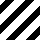
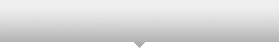
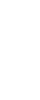
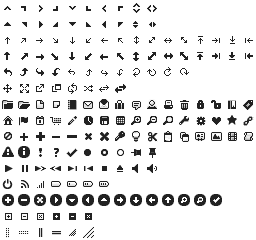
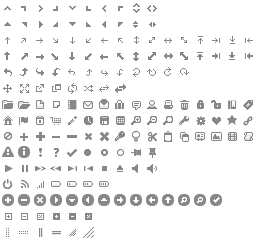
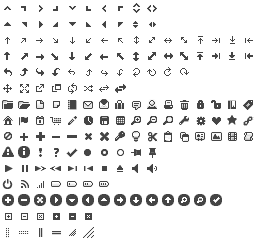
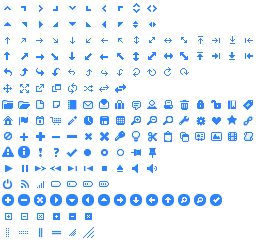
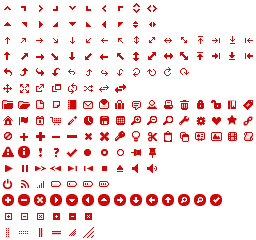
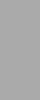
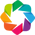
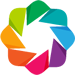
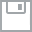
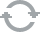
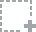
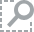
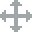
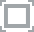
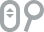

In [2]:
from cameo import load_model
from cameo.strain_design import pathway_prediction

In [3]:
model = load_model("iMM904")

In [4]:
predictor = pathway_prediction.PathwayPredictor(model=model, compartment_regexp=re.compile(".*_c$"))

In [5]:
pathways = predictor.run(product="vanillin", max_predictions=5)

id                                           equation  lower_bound  \
0   MNXR5336  NAD(+) + H2O + vanillin <=> vanillate + NADH(2...        -1000   
1   MNXR5340  formaldehyde + NAD(+) + 3,4-dihydroxybenzoate ...        -1000   
2  MNXR68718  H2O + 3,4-dihydroxybenzoate <=> 3-dehydroshiki...        -1000   

   upper_bound  
0         1000  
1         1000  
2         1000

id                                           equation  lower_bound  \
0   MNXR230  NADP(+) + H2O + 3,4-dihydroxybenzoate <=> O2 +...        -1000   
1  MNXR5336  NAD(+) + H2O + vanillin <=> vanillate + NADH(2...        -1000   
2  MNXR5340  formaldehyde + NAD(+) + 3,4-dihydroxybenzoate ...        -1000   

   upper_bound  
0         1000  
1         1000  
2         1000

id                                           equation  lower_bound  \
0   MNXR5336  NAD(+) + H2O + vanillin <=> vanillate + NADH(2...        -1000   
1   MNXR5340  formaldehyde + NAD(+) + 3,4-dihydroxybenzoate ...        -1000   
2  MNXR14769  NAD(+) + 3,4-dihydroxybenzoate + H2O <=> O2 + ...        -1000   

   upper_bound  
0         1000  
1         1000  
2         1000

id                                           equation  lower_bound  \
0  MNXR5336  NAD(+) + H2O + vanillin <=> vanillate + NADH(2...        -1000   
1  MNXR5340  formaldehyde + NAD(+) + 3,4-dihydroxybenzoate ...        -1000   
2  MNXR5836  O2 + 3.0 H(+) + NADPH + anthranilate <=> catec...        -1000   
3  MNXR7067  3,4-dihydroxybenzoate + H(+) <=> catechol + CO(2)        -1000   

   upper_bound  
0         1000  
1         1000  
2         1000  
3         1000

id                                           equation  lower_bound  \
0  MNXR5336  NAD(+) + H2O + vanillin <=> vanillate + NADH(2...        -1000   
1  MNXR5340  formaldehyde + NAD(+) + 3,4-dihydroxybenzoate ...        -1000   
2  MNXR6101  O2 + 3.0 H(+) + NADH(2-) + anthranilate <=> ca...        -1000   
3  MNXR7067  3,4-dihydroxybenzoate + H(+) <=> catechol + CO(2)        -1000   

   upper_bound  
0         1000  
1         1000  
2         1000  
3         1000

In [6]:
from cameo import phenotypic_phase_plane
from cameo.util import TimeMachine
from cameo.visualization.plotting import Grid

In [10]:
with Grid(nrows=3) as grid:
    for i, pathway in enumerate(pathways):
        with TimeMachine() as tm:
            pathway.plug_model(model, tm=tm)
            ppp = phenotypic_phase_plane(model, variables=[model.reactions.biomass_SC5_notrace], objective=pathway.product)
            ppp.plot(grid=grid, width=450, height=350, title="Pathway %i" % (i+1), axis_font_size="12pt")